## Ridge and lasso
These are  models which try to correct the low variance, overfitting and high slope gradient descent nature of linear regression
for linear regression the formula for cost function is = [summation(x)](y-y^2) 

Ridge: we add Lamda and slope^2 in the above formula 

Lasso: we add Lamda and modulus of slope


In [61]:
from sklearn.datasets import load_boston
import numpy as np

In [16]:
boston = load_boston()

In [22]:
import pandas as pd
df_boston = pd.DataFrame(boston.data)

In [24]:
df_boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [39]:
df_boston.columns = boston.feature_names

In [42]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [44]:
df_boston['Price']=boston.target

In [46]:
X = df_boston.iloc[:,:-1]

In [48]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [50]:
y=df_boston.iloc[:,-1]

## Linear regression


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [57]:
l_reg = LinearRegression()
mean_serror = cross_val_score(l_reg,X,y,scoring='neg_mean_squared_error',cv=5)
##we want this score to be as near as 0 as possible

In [58]:
mean_serror

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [62]:
mean_mer = np.mean(mean_serror)

In [63]:
mean_mer

-37.13180746769922

## Ridge regression

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

In [87]:
parameters = {'alpha' : [1e-15,2e-10,1e-10,1e-5,0.0001,0.001,0.01,0.1,1,10,100,150,300,500,1000]}
ridge_reg = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)


In [88]:
ridge_reg.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 2e-10, 1e-10, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 10, 100, 150, 300, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [89]:
ridge_reg.best_estimator_

Ridge(alpha=150, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [90]:
ridge_reg.best_params_

{'alpha': 150}

In [91]:
ridge_reg.best_score_

-29.753617234142723

### Lasso regression

In [92]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [93]:
parameters = {'alpha' : [1e-15,2e-10,1e-10,1e-5,0.0001,0.001,0.01,0.1,1,10,100,150,300,500,1000]}
lasso_reg = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)


In [96]:
lasso_reg.fit(X,y)

C:\Users\jugal\Python\envs\new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4430.746729651311, tolerance: 3.9191485420792076
  model = cd_fast.enet_coordinate_descent(
C:\Users\jugal\Python\envs\new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4397.459304778431, tolerance: 3.3071316790123455
  model = cd_fast.enet_coordinate_descent(
C:\Users\jugal\Python\envs\new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3796.653037433508, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\jugal\Python\envs\new\lib\site-packages\sklearn\linear_model\_coordinate_descent

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 2e-10, 1e-10, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 10, 100, 150, 300, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [97]:
lasso_reg.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [98]:
lasso_reg.best_params_

{'alpha': 0.1}

In [99]:
lasso_reg.best_score_

-34.83043231820268

## Visualize the curve


In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [101]:
#lasso pred
pred_lasso = lasso_reg.predict(X_test)

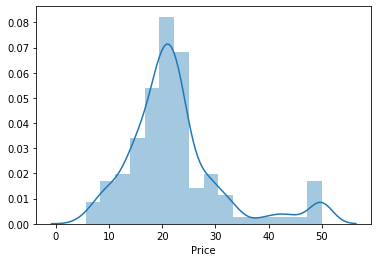

In [105]:
import seaborn as sns
sns.distplot(y_test)

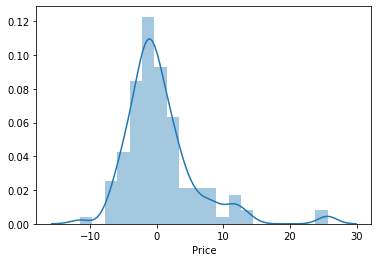

In [106]:
sns.distplot(y_test-pred_lasso)

In [107]:
pred_ridge = ridge_reg.predict(X_test)

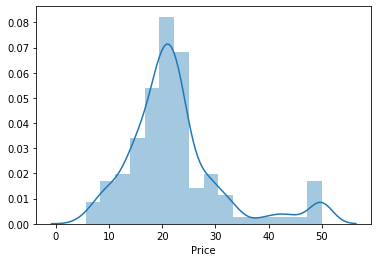

In [108]:
sns.distplot(y_test)

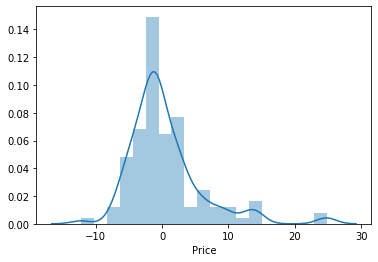

In [109]:
sns.distplot(y_test-pred_ridge)